<a href="https://colab.research.google.com/github/athulmkpalath/codsoft/blob/main/IRIS_FLOWER_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IRIS FLOWER CLASSIFICATION**

---



INTERNSHIP - PROJECT - @CODSOFT

*The Iris flower dataset consists of three species: setosa, versicolor,
and virginica. These species can be distinguished based on their
measurements.objective is to train a machine learning model that can learn from
these measurements and accurately classify the Iris flowers into
their respective species.*

**LIBRARIES**

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


**IMPORT DATA**

In [3]:
data = pd.read_csv('/content/IRIS.csv')

**FEATURE OF THE DATA**

In [4]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [9]:
data.shape

(150, 5)

In [11]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**DATA PREPROCESSING **

In [12]:
data.duplicated().sum()

3

In [13]:
data.drop_duplicates(subset = None, keep='first', inplace=True, ignore_index=False)
data.shape

(147, 5)

In [14]:
data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

**DATA VISUALIZATION**

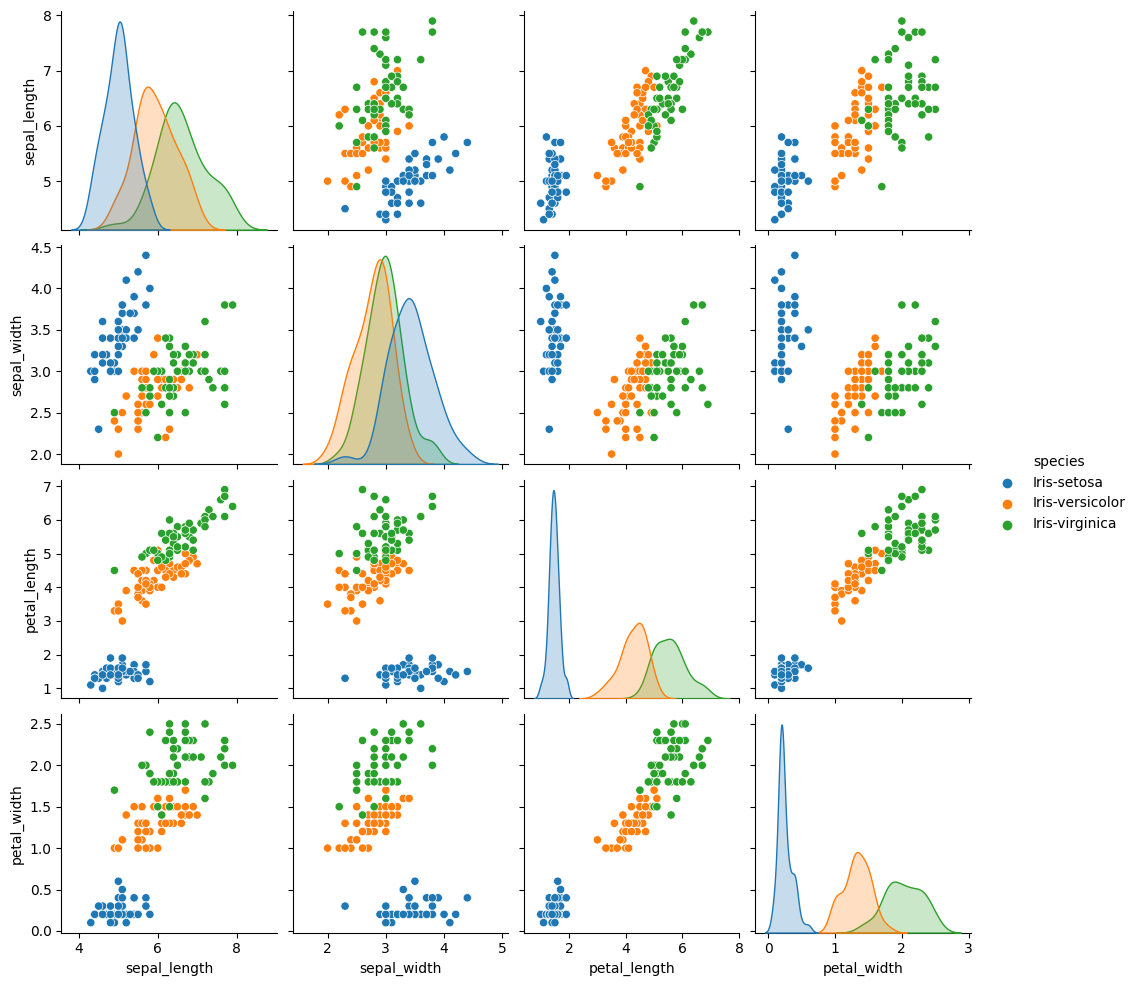

In [24]:

sns.pairplot(data, hue="species")
plt.show()



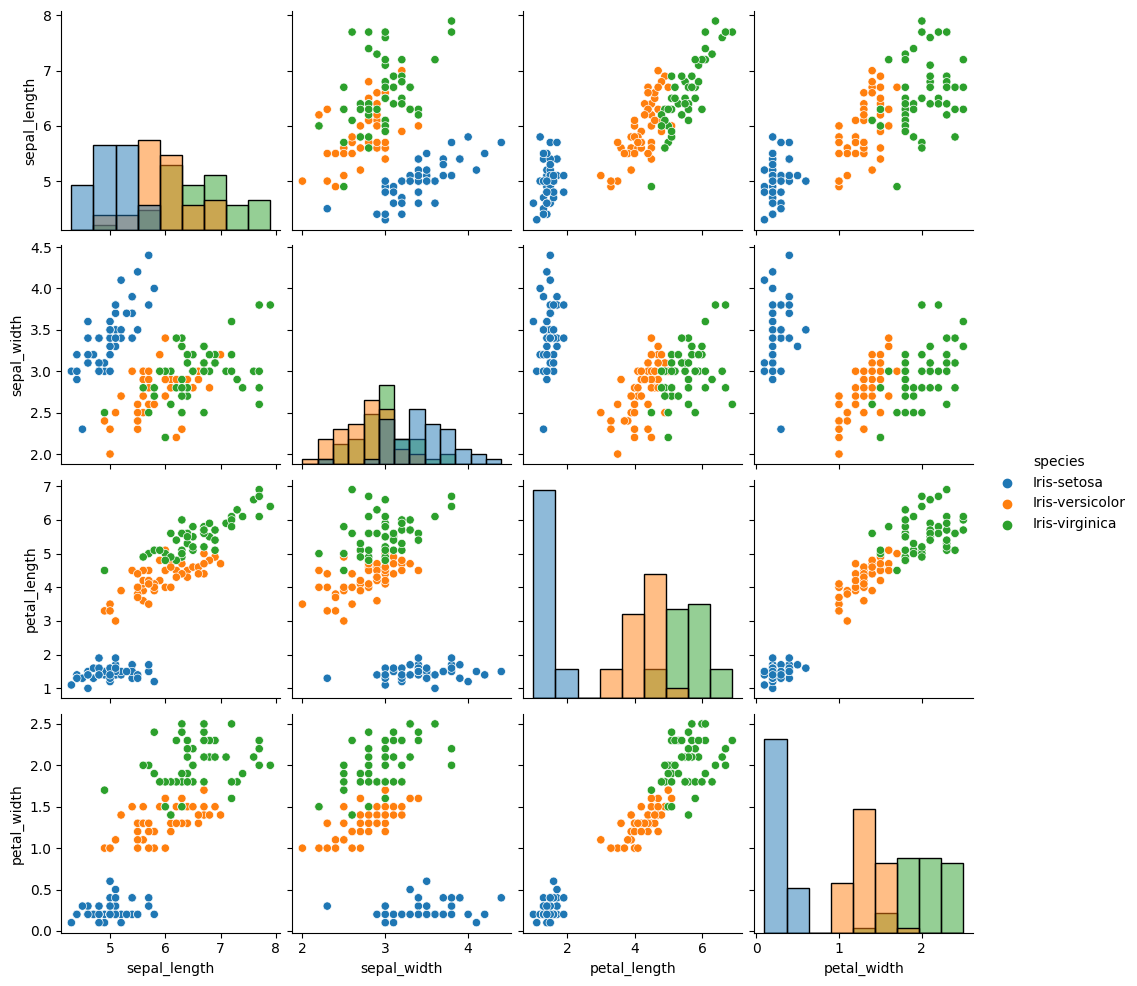

In [33]:
# Create a pair-wise scatter plot matrix
sns.pairplot(data, hue="species", diag_kind="hist")
plt.show()

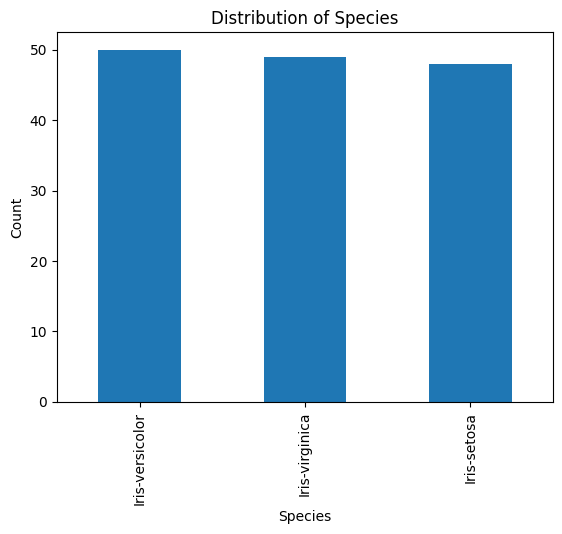

In [25]:
# Species Distribution
species_counts = data['species'].value_counts()
species_counts.plot(kind='bar')
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Distribution of Species')
plt.show()

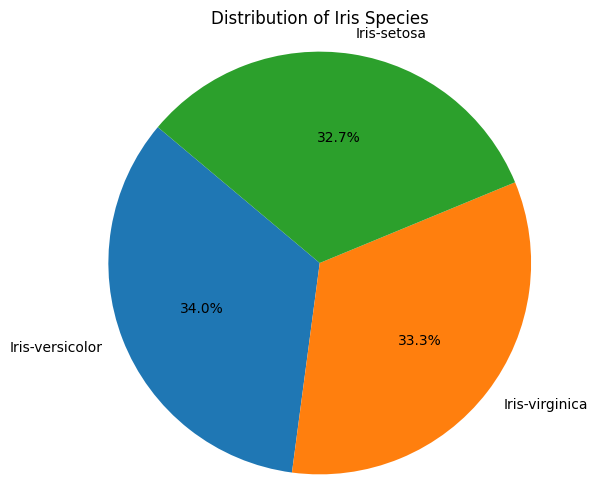

In [27]:
# Count the number of occurrences of each species
species_counts = data['species'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Iris Species')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()

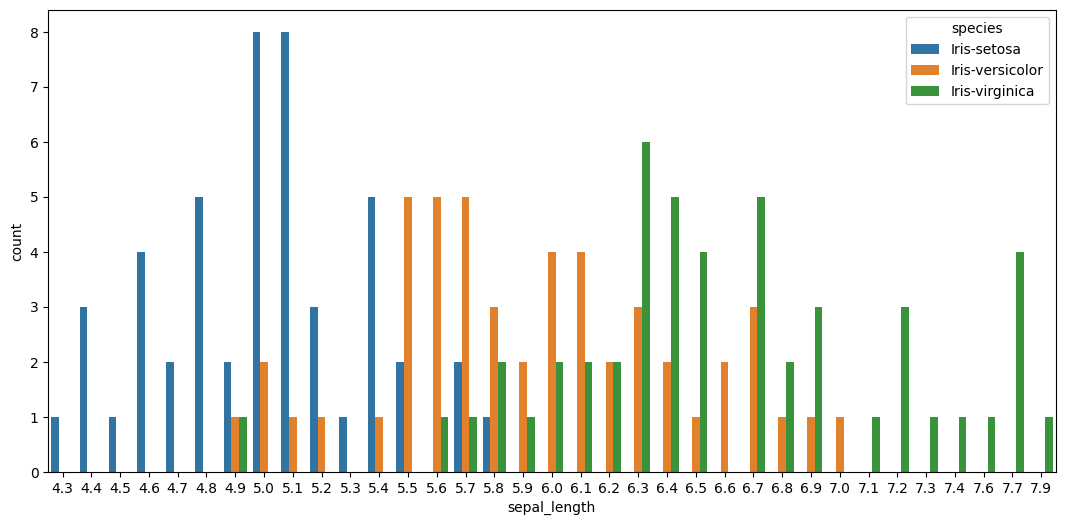

In [17]:
plt.figure(figsize=(13,6))
sns.countplot(x="sepal_length", data = data, hue="species")
plt.show()

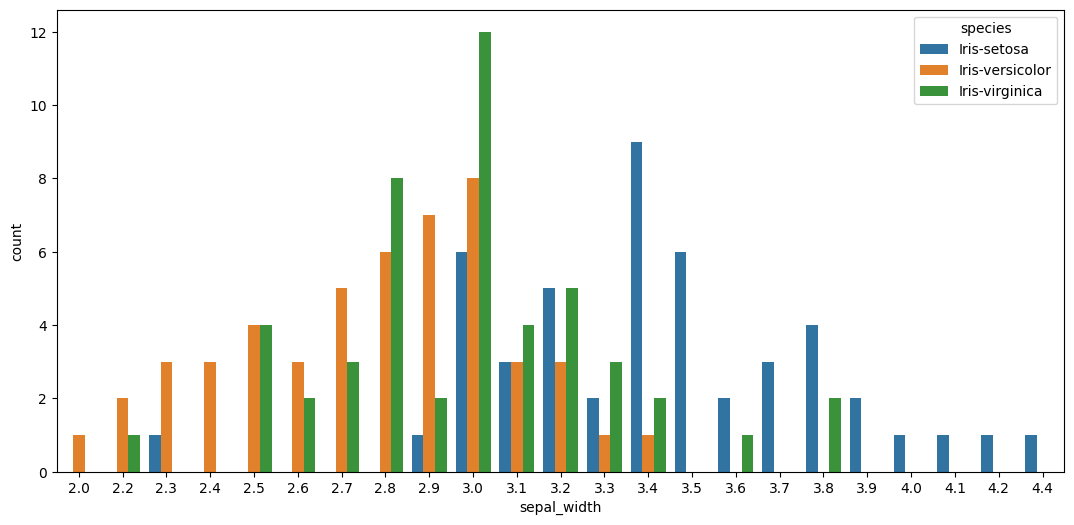

In [18]:
plt.figure(figsize=(13,6))
sns.countplot(x="sepal_width", data=data, hue="species")
plt.show()

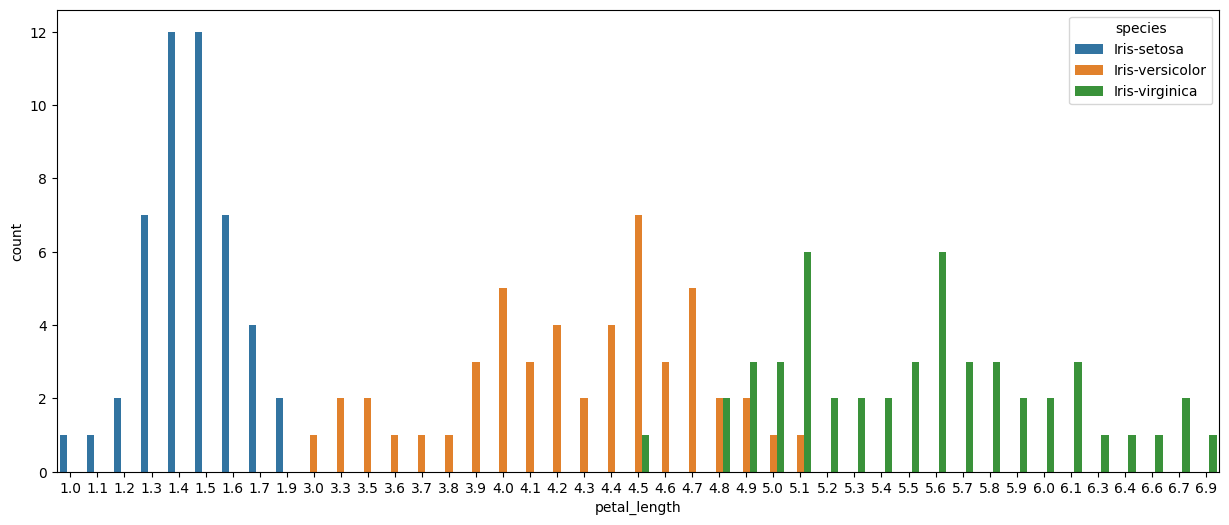

In [19]:
plt.figure(figsize=(15,6))
sns.countplot(x="petal_length", data=data, hue="species")
plt.show()

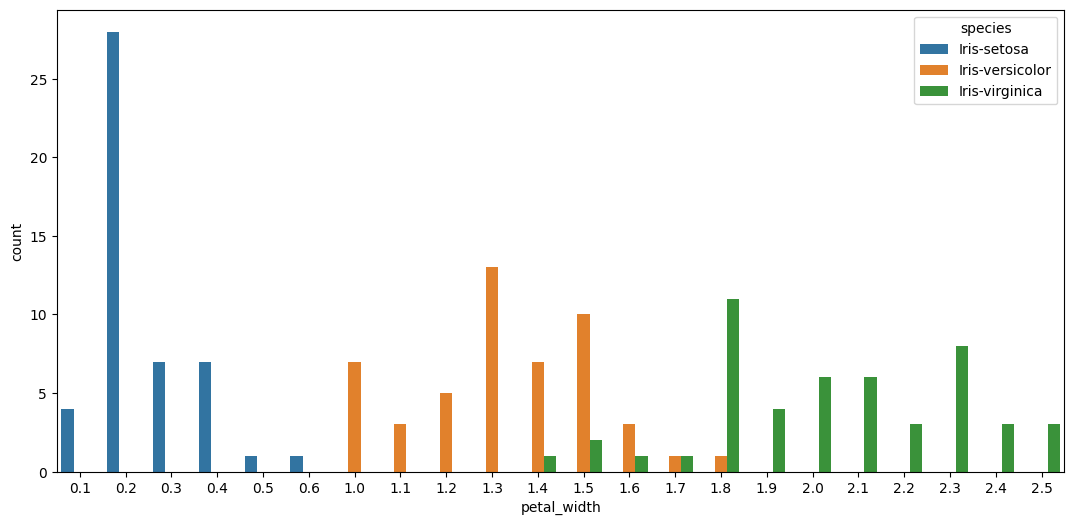

In [20]:
plt.figure(figsize=(13,6))
sns.countplot(x="petal_width", data=data, hue="species")
plt.show()

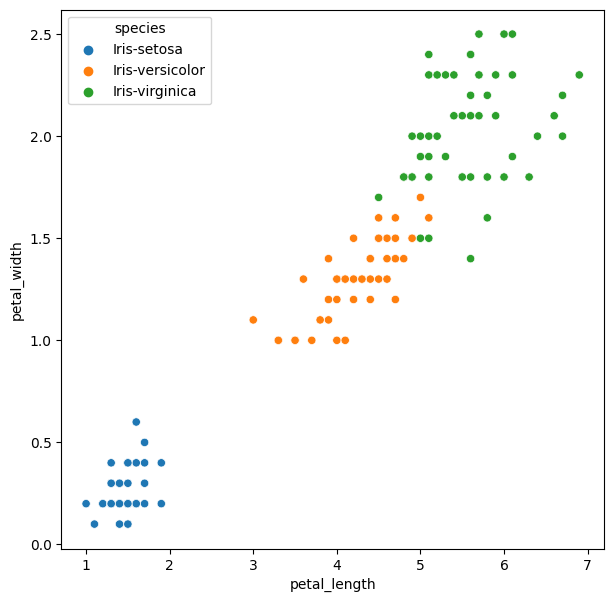

In [21]:
plt.figure(figsize=(7,7))
sns.scatterplot(x="petal_length", y="petal_width", data=data, hue="species")
plt.show()

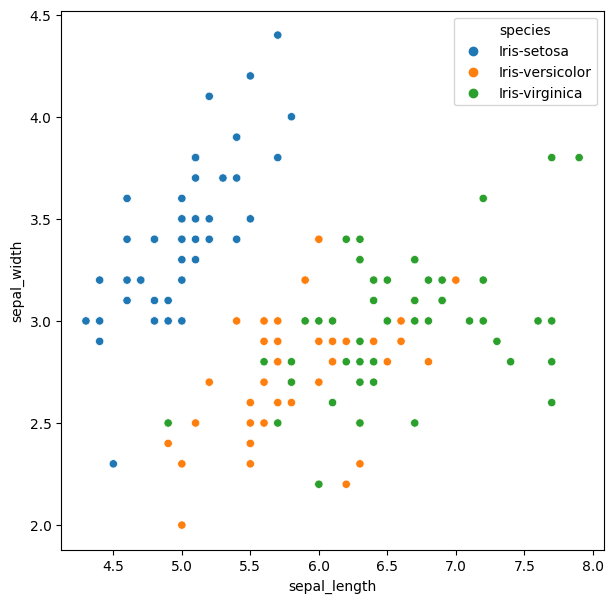

In [22]:
plt.figure(figsize=(7,7))
sns.scatterplot(x="sepal_length", y="sepal_width", data=data, hue="species")
plt.show()

<ipython-input-26-fa5cd8220f27>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


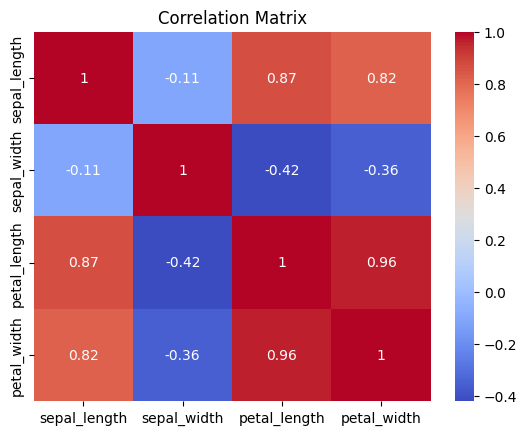

In [26]:
# Correlation Analysis
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

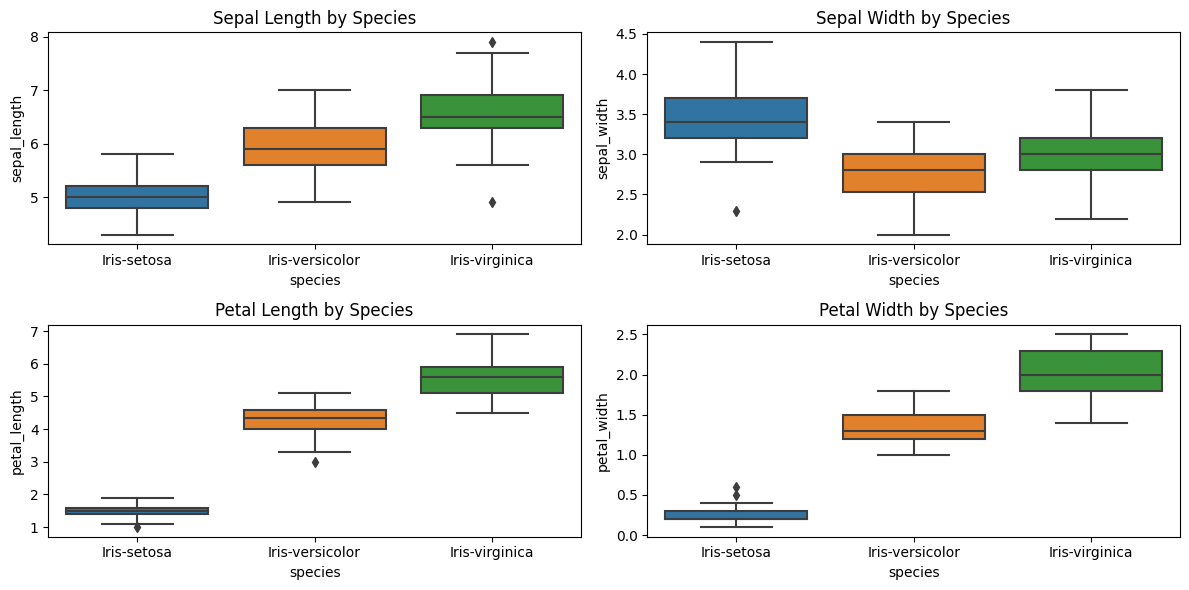

In [28]:
# Create boxplots for each numerical variable by species
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.boxplot(x="species", y="sepal_length", data=data)
plt.title("Sepal Length by Species")

plt.subplot(2, 2, 2)
sns.boxplot(x="species", y="sepal_width", data=data)
plt.title("Sepal Width by Species")

plt.subplot(2, 2, 3)
sns.boxplot(x="species", y="petal_length", data=data)
plt.title("Petal Length by Species")

plt.subplot(2, 2, 4)
sns.boxplot(x="species", y="petal_width", data=data)
plt.title("Petal Width by Species")

plt.tight_layout()
plt.show()

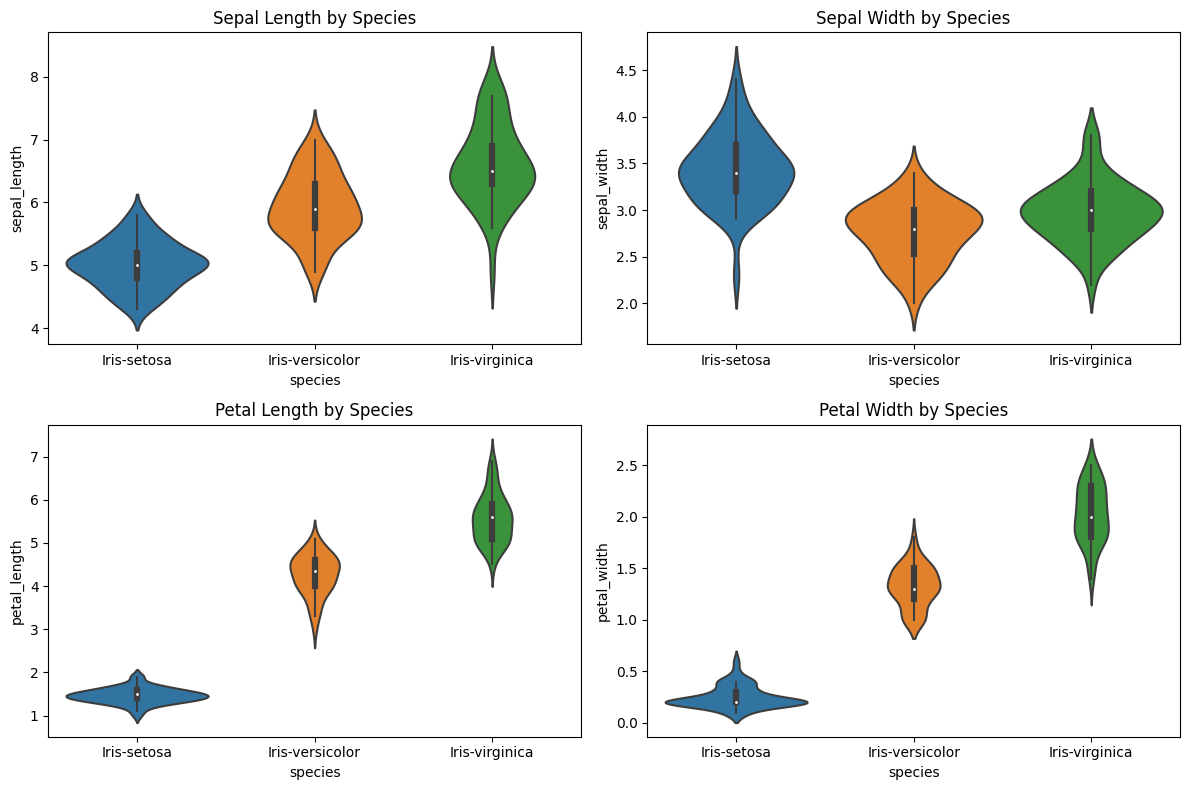

In [30]:
# Violin Plot for each numerical feature by species
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.violinplot(x='species', y='sepal_length', data=data)
plt.title('Sepal Length by Species')

plt.subplot(2, 2, 2)
sns.violinplot(x='species', y='sepal_width', data=data)
plt.title('Sepal Width by Species')

plt.subplot(2, 2, 3)
sns.violinplot(x='species', y='petal_length', data=data)
plt.title('Petal Length by Species')

plt.subplot(2, 2, 4)
sns.violinplot(x='species', y='petal_width', data=data)
plt.title('Petal Width by Species')

plt.tight_layout()
plt.show()


### **DATA MODELING**

**DecisionTreeClassifier**

In [34]:

# Data Preprocessing
X = data.drop('species', axis=1)
y = data['species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.93
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30

[[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]


**Logistic Regression Model**

In [39]:

# Data Preprocessing
X = data.drop('species', axis=1)
y = data['species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter if necessary
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.93
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30

[[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]


**SVM model**

In [52]:

# Data Preprocessing
X = data.drop('species', axis=1)
y = data['species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SVM model
model = SVC(kernel='linear')  # You can also use other kernels like 'rbf'
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.97
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0  9  1]
 [ 0  0  9]]


**RandomForestClassifier**

In [44]:

# Data Preprocessing
X = data.drop('species', axis=1)
y = data['species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.93
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30

[[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]


**k-Nearest Neighbors (K-NN)-MODEL**

In [46]:

# Data Preprocessing
X = data.drop('species', axis=1)
y = data['species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the K-NN model
model = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.93
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30

[[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]


**ACCURACY OF MODELS**

In [51]:

# Data Preprocessing
X = data.drop('species', axis=1)
y = data['species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and evaluate multiple models
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Support Vector Machine', SVC(kernel='linear')),
    ('K-Nearest Neighbors', KNeighborsClassifier(n_neighbors=3)),
]

best_model = None
best_accuracy = 0

for model_name, model in models:
    # Perform cross-validation to assess model performance
    scores = cross_val_score(model, X_train, y_train, cv=5)
    mean_accuracy = scores.mean()

    if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_model = model_name

    print(f'{model_name} - Mean Accuracy: {mean_accuracy:.2f}')

# Train and evaluate the best model on the test set
print(f'The best model is: {best_model}')
selected_model = [model for model_name, model in models if model_name == best_model][0]
selected_model.fit(X_train, y_train)
y_pred = selected_model.predict(X_test)

# Evaluate the selected model
accuracy = accuracy_score(y_test, y_pred)
print(f'Selected Model Accuracy on Test Set: {accuracy:.2f}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Logistic Regression - Mean Accuracy: 0.97
Random Forest - Mean Accuracy: 0.97
Support Vector Machine - Mean Accuracy: 0.99
K-Nearest Neighbors - Mean Accuracy: 0.97
The best model is: Support Vector Machine
Selected Model Accuracy on Test Set: 0.97
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0  9  1]
 [ 0  0  9]]


**ACCURACY PLOT**

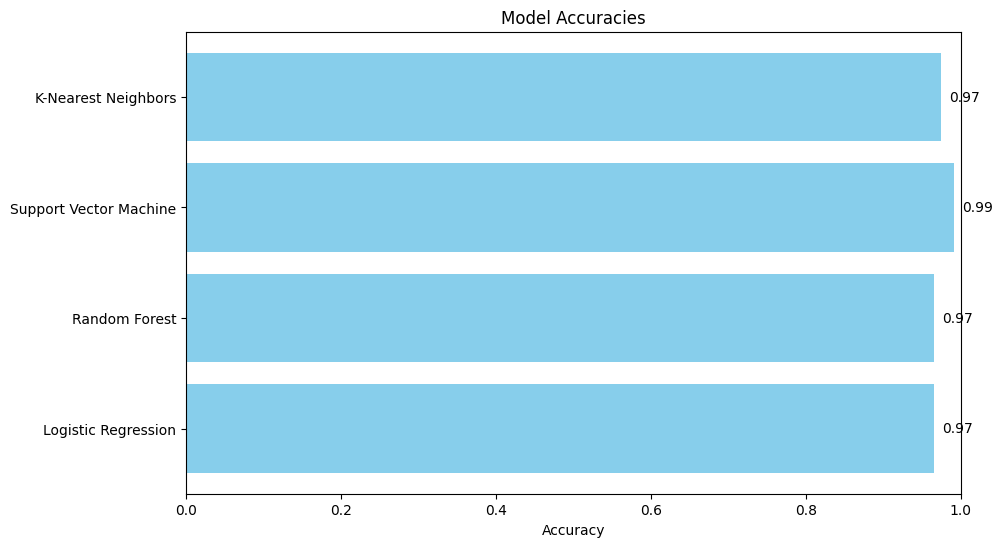

In [53]:
model_accuracies = []  # To store the accuracies

for model_name, model in models:
    # Perform cross-validation to assess model performance
    scores = cross_val_score(model, X_train, y_train, cv=5)
    mean_accuracy = scores.mean()
    model_accuracies.append((model_name, mean_accuracy))

# Extract model names and accuracies
model_names, accuracies = zip(*model_accuracies)

# Create a bar graph of model accuracies
plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Accuracies')
plt.xlim(0, 1.0)

# Display the accuracy values on the bars
for i, accuracy in enumerate(accuracies):
    plt.text(accuracy + 0.01, i, f'{accuracy:.2f}', va='center')

plt.show()